# Happiness Data Context and description of the data

### Background information on the subject and field of study：
- The data, World Happiness Report, explores the happiness scores and rankings by country. The scores are based on answers to the main life evaluation question asked in the poll. In this data, we have total of 158 rows represent 158 countries. The columns following the happiness score estimate the extent to which each of six factors- economic production, social support, life expectancy, freedom, absence of corruption, and generosity- contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors. These columns also describe the extent to which these factors contribute in evaluating the happiness in each country. The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country as stated in the previous answer. If you add all these factors up, you get the happiness score. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

### Information about data collection :

- The data was collected by the Gallup World Poll, who track and analyze crucial world issues affecting lives of people. And it was released at United Nations. The world happiness dataset we used was collected in 2015 and 2016 individually. Data were collected from people in over 150 countries. The typical survey includes at least 1,000 individuals. In some countries, Gallup collects oversamples in major cities or areas of special interest. For large countries, such as China and Russia, larger sample sizes would be assigned to these counties. 

- Respondents were required to think and answer their feelings toward happiness running from 0 to 10. The scores are based on answer to the main life evaluation questions asked in the poll. Each variable measured reveals a spopulated-weighted average score and is tracked over time and compared against other countries. 

- Gallup uses telephone surveys in countries where telephone coverage represents at least 80% of the population or is the customary survey methodology. In countries where telephone interviewing is employed, Gallup uses a random-digit-dial method or a nationally representative list of phone numbers. In the developing world, Gallup uses an area frame design for face-to-face interviewing in randomly selected households. While telephone interviews are about 30 minutes, face-to-face interviews are approximately one hour.  

- First, Gallup selects the Primary Sampling Units (PSUs). Sample selection is based on probabilities proportional to population size; otherwise, Gallup uses simple random sampling. Gallup makes at least three attempts to reach a person in each household. Then, Gallup uses random-route procedures to select sampled households. If the interviewer cannot obtain an interview at the initial sampled household, he or she uses a simple substitution method. Finally, they select respondents. In face-to-face and telephone methodologies, random respondent selection is achieved by using either the latest birthday or Kish grid method.

- However, some staticians argue that these surveys depend on subjective self-reporting, not to mention eliding cultural differences. 


# Happiness Data Exploratory Analysis
#### Load standard libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split, cross_val_score

# Data Overview
#### Load data

In [2]:
df = pd.read_csv("2015.csv")

##### Set country name as index

In [3]:
df.set_index("Country", inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 158 entries, Switzerland to Togo
Data columns (total 11 columns):
Region                           158 non-null object
Happiness Rank                   158 non-null int64
Happiness Score                  158 non-null float64
Standard Error                   158 non-null float64
Economy (GDP per Capita)         158 non-null float64
Family                           158 non-null float64
Health (Life Expectancy)         158 non-null float64
Freedom                          158 non-null float64
Trust (Government Corruption)    158 non-null float64
Generosity                       158 non-null float64
Dystopia Residual                158 non-null float64
dtypes: float64(9), int64(1), object(1)
memory usage: 14.8+ KB


In [4]:
df.head()

,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,,,,,,,,,,,
Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [5]:
print(df.shape)

(158, 11)


#### The data has 158 rows and 11 columns. Each row represents a country and each column contains information about the countries. The key variables that influence Happiness Score are:
- Economy (GDP per Capita)
- Family
- Health (Life Expectancy)
- Freedom
- Trust (Government Corruption)
- Generosity.

In [6]:
key_variables = ["Happiness Score", "Economy (GDP per Capita)","Family", "Health (Life Expectancy)", "Freedom", "Trust (Government Corruption)", "Generosity",]
df[key_variables].head()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
Country,,,,,,,
Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


# Exploratory Analysis

In [7]:
df[key_variables].describe()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,5.375734,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296
std,1.145010,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685
min,2.839000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.526000,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553
50%,5.232500,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130
75%,6.243750,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883
max,7.587000,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880


### Pairwise Scatterplot

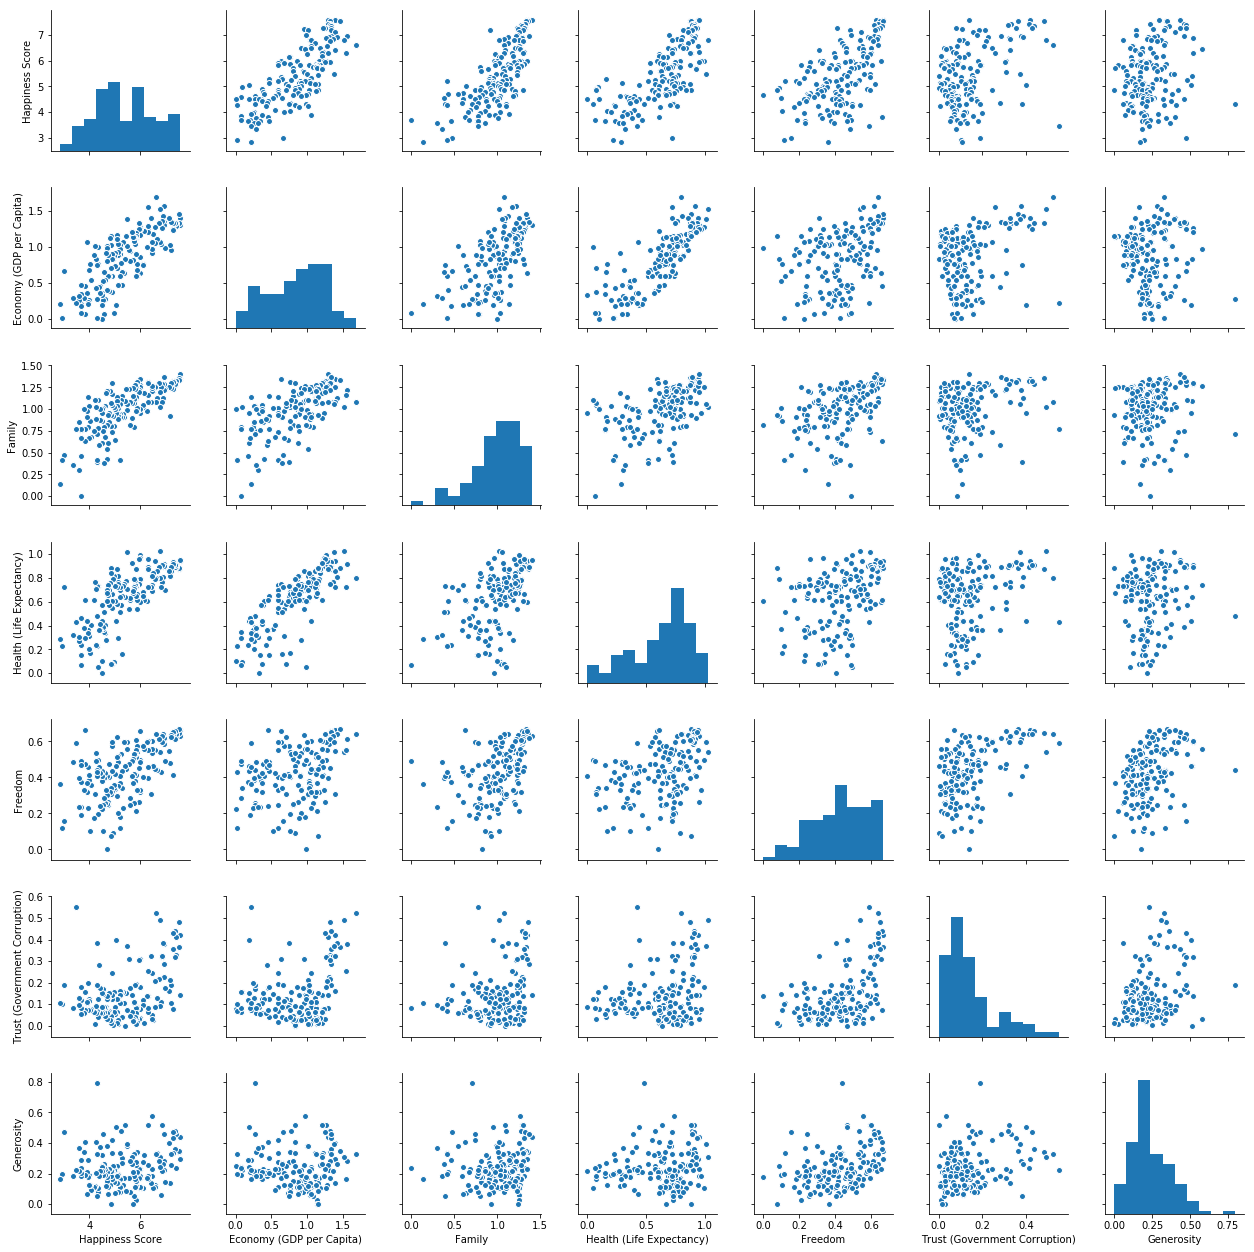

In [8]:
sns.pairplot(df[key_variables], size = 2.5)
plt.show()

From the pairwise scatterplot, we observed that Happiness Score and Economic (GDP Per Capita) has the strongest positive linear relationship. The distributions of Family, Health (Life Expectancy) and Freedom also have a relatively strong positive correlation with Happiness Score. Notice that the distributions of Economic (GDP Per Capita), Family, Health (Life Expectancy) and Freedom are left skewed while Trust (Government Corruption) and Generousity are right skewed.

### Correlation Plot

                               Happiness Score  Economy (GDP per Capita)  \
Happiness Score                       1.000000                  0.780966   
Economy (GDP per Capita)              0.780966                  1.000000   
Family                                0.740605                  0.645299   
Health (Life Expectancy)              0.724200                  0.816478   
Freedom                               0.568211                  0.370300   
Trust (Government Corruption)         0.395199                  0.307885   
Generosity                            0.180319                 -0.010465   

                                 Family  Health (Life Expectancy)   Freedom  \
Happiness Score                0.740605                  0.724200  0.568211   
Economy (GDP per Capita)       0.645299                  0.816478  0.370300   
Family                         1.000000                  0.531104  0.441518   
Health (Life Expectancy)       0.531104                  1.000000  0.360477

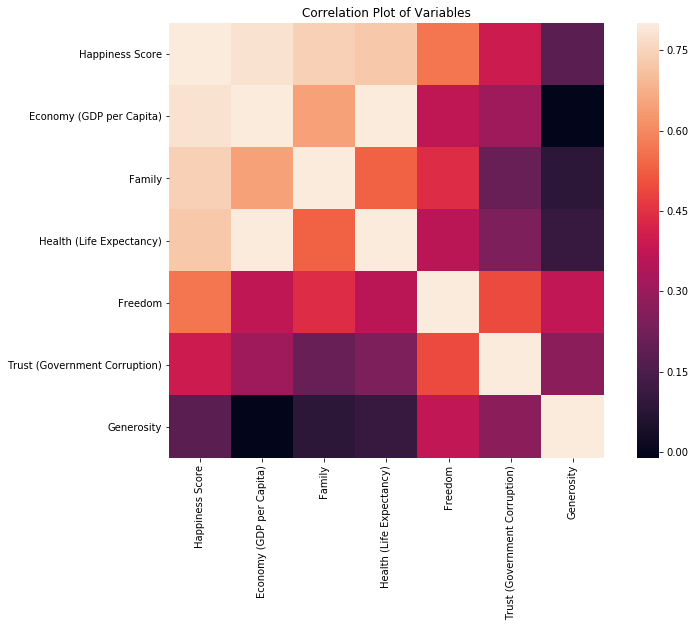

In [9]:
corrmat = df[key_variables].corr()
print(corrmat)
ax, fig = plt.subplots(figsize = (12, 8))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.title("Correlation Plot of Variables")
plt.show()

Happiness Score has the highest correlation ( r = 0.781 ) with Economic (GDP per Capita). It also has strong correlation with Family and Health (Life Expectancy). Note that Economy (GDP per Capita) and Health (Life Expectancy) has high correlation with each other so we need to be aware of multicolinearity when running regression model. Freedom and Happiness Score are somewhat correlated ( r = 0.568 ), and Freedom itself has very little correlation with other variables.

### Side by Side Boxplot

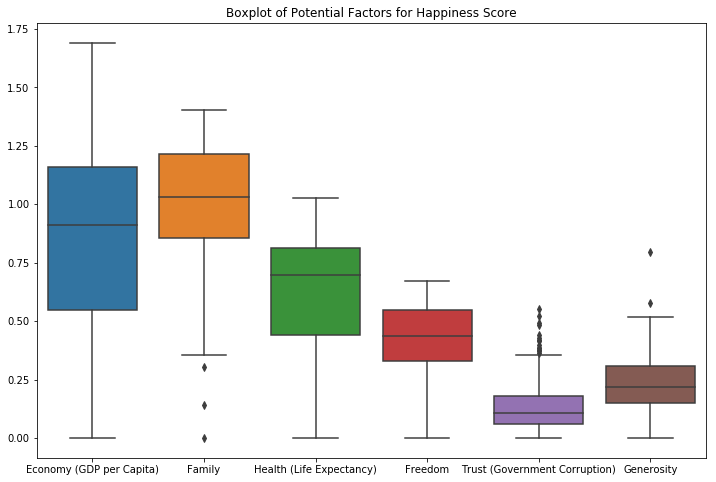

In [10]:
predictors = [
 'Economy (GDP per Capita)',
 'Family',
 'Health (Life Expectancy)',
 'Freedom',
 'Trust (Government Corruption)',
 'Generosity']
ax, fig = plt.subplots(figsize = (12, 8))
sns.boxplot(data = df[predictors])
plt.title("Boxplot of Potential Factors for Happiness Score")
plt.show()

Boxplot shows that Economy has the most variation among all countries.

### Happiness Score

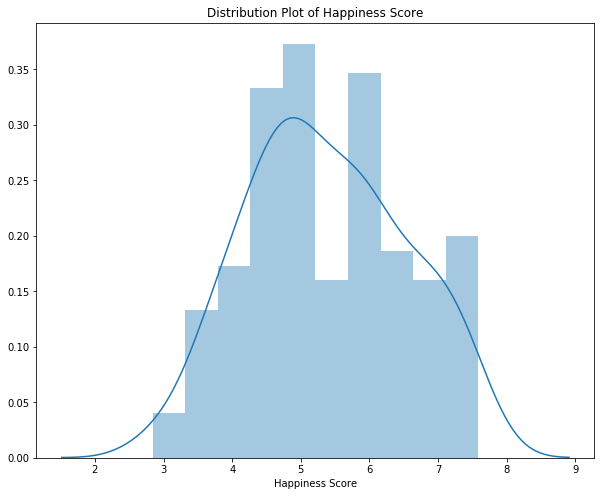

Country
Switzerland    7.587
Name: Happiness Score, dtype: float64


In [11]:
ax, fig = plt.subplots(figsize = (10, 8))
sns.distplot(df['Happiness Score'], bins=10)
plt.title("Distribution Plot of Happiness Score")
plt.show()
print(df["Happiness Score"][df["Happiness Score"] == max(df["Happiness Score"])])

In [12]:
print(df['Happiness Score'].describe())
df[df['Happiness Score'] == max(df['Happiness Score'])]

count    158.000000
mean       5.375734
std        1.145010
min        2.839000
25%        4.526000
50%        5.232500
75%        6.243750
max        7.587000
Name: Happiness Score, dtype: float64


,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,,,,,,,,,,,
Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738


First, we investigate Happiness Score. The summary shows that the average is about 5.38 with a standard deviation of 1.15. The Maximum is 7.587 and the minimum is 2.839. The distribution plot shows that Happiness Score is somewhat normally distributed. Switzerland has the highest Happiness Score among all countries.

### Regroup Region into 6 Continents for better visualization


In [13]:
df['Continents'] = df['Region']
# Group Europe Together
for i in range(158):
   if df.Continents[i] == "Western Europe":
        df.Continents[i] = "Europe"
for i in range(158):
   if df.Continents[i] == "Central and Eastern Europe":
        df.Continents[i] = "Europe"
# Group Asis Together        
for i in range(158):
   if df.Continents[i] == "Southern Asia":
        df.Continents[i] = "Asia"
for i in range(158):
   if df.Continents[i] == "Southeastern Asia":
        df.Continents[i] = "Asia"
for i in range(158):
   if df.Continents[i] == "Eastern Asia":
        df.Continents[i] = "Asia"
# Group Africa Together
for i in range(158):
   if df.Continents[i] == "Middle East and Northern Africa":
        df.Continents[i] = "Africa"
for i in range(158):
   if df.Continents[i] == "Sub-Saharan Africa":
        df.Continents[i] = "Africa"
# Rename Latin America and Caribbean to South America        
for i in range(158):
   if df.Continents[i] == "Latin America and Caribbean":
        df.Continents[i] = "South America"
# Rename Australia and New Zealand to Oceania
for i in range(158):
   if df.Continents[i] == "Australia and New Zealand":
        df.Continents[i] = "Oceania"

/Users/Michael/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/Michael/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/Michael/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/Users/Michael/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWith

### Happiness Score Against Economy (GDP per Capita) by Continents

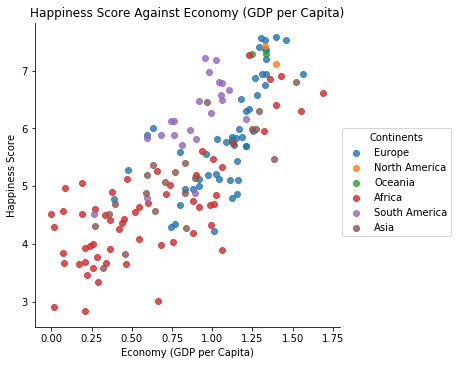

In [14]:
sns.lmplot(x = "Economy (GDP per Capita)", y = "Happiness Score", hue = "Continents", fit_reg = False, data = df)
plt.title("Happiness Score Against Economy (GDP per Capita)")
plt.show()

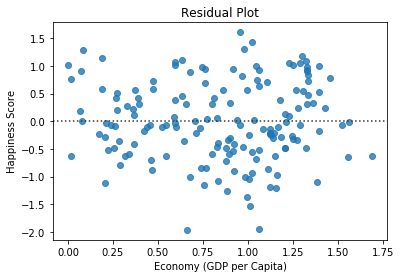

In [15]:
sns.residplot(x = "Economy (GDP per Capita)", y = "Happiness Score", data = df)
plt.title("Residual Plot")
plt.show()

As we can see, Happiness Score and Economy (GDP per Capita) are positively correlated and the relationship is somewhat linear. The residuals are fairly random distributed as well. In addition, Majority of African countries have low Happiness Score and Economy Size while Majority of European, Oceania and North American countries have high Happiness Score and Economy Size.

### How Happiness Scores differ acorss Regions?

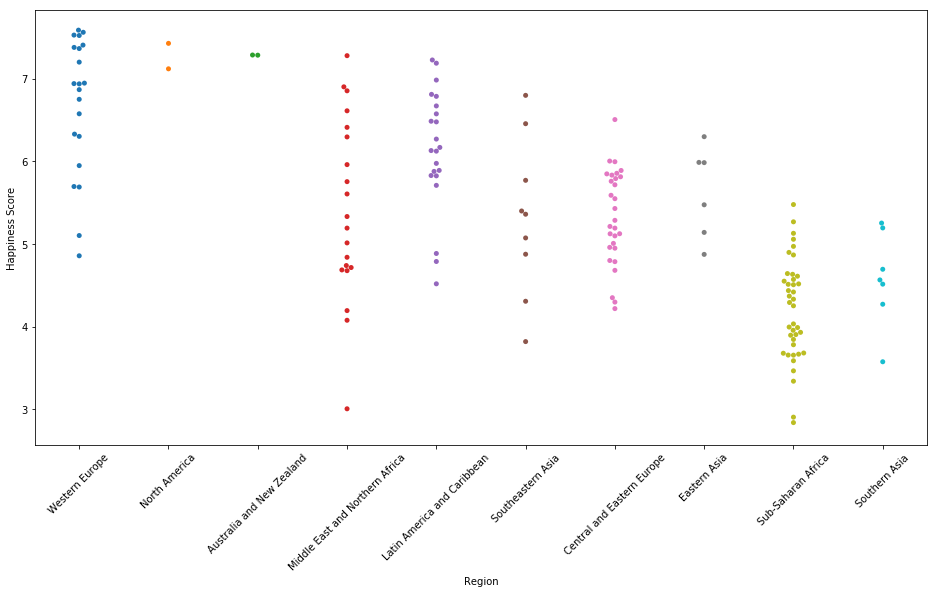

In [16]:
ax, fig = plt.subplots(figsize = (16, 8))
sns.swarmplot(x = "Region", y = "Happiness Score", data = df)
plt.xticks(rotation=45)
plt.show()

In [17]:
print(df.groupby("Region")["Happiness Score"].mean().sort_values(ascending = False))

Region
Australia and New Zealand          7.285000
North America                      7.273000
Western Europe                     6.689619
Latin America and Caribbean        6.144682
Eastern Asia                       5.626167
Middle East and Northern Africa    5.406900
Central and Eastern Europe         5.332931
Southeastern Asia                  5.317444
Southern Asia                      4.580857
Sub-Saharan Africa                 4.202800
Name: Happiness Score, dtype: float64


From the swarmplot and statistics, we see that Austrialia and New Zealand, North America and Western Europe have the highest Happiness Score while Sub-Saharan Africa has the lowest.

In [18]:
size = (df["Economy (GDP per Capita)"].values) * 3000 # Create an array for economy size
continents = df["Continents"].values
continents = pd.Categorical.from_array(continents).labels # Convert string actor to numeric values
colors = np.array(["r","b","g","m","y","gold","pink","maroon","steelblue","lightseagreen"])
c = colors[continents]

/Users/Michael/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Michael/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: 'labels' is deprecated. Use 'codes' instead
  This is separate from the ipykernel package so we can avoid doing imports until


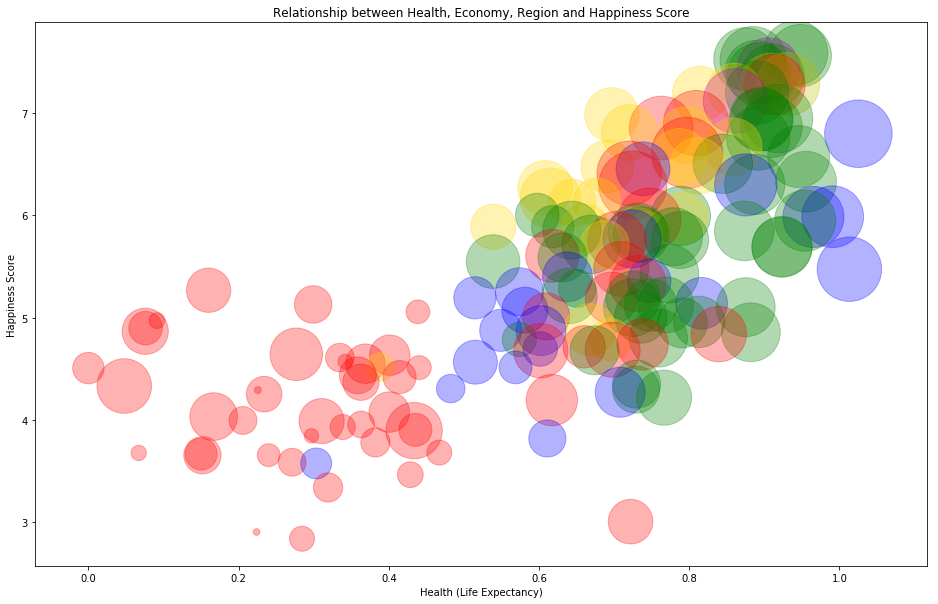

In [19]:
ax, fig = plt.subplots(figsize = (16, 10))
plt.scatter(x = "Health (Life Expectancy)", y = "Happiness Score", data = df, s = size, c = c,alpha = 0.3)
plt.title("Relationship between Health, Economy, Region and Happiness Score")
plt.xlabel("Health (Life Expectancy)")
plt.ylabel("Happiness Score")
plt.show()

The size of the bubble represents the economy size and color represents the continent that country belongs. Again, we observed that economy size, life expectancy and happiness score are positively c

# Multiple Linear regression Model

From substantial exploratory analysis, we found that Economy (GDP per Capita), Family, Health (Life Expectancy) and Freedom are potential variables to predict Happiness Score. Now, we build a multiple linear regression for future prediction.

## Split 2015 data to training and testing

In [20]:
np.random.seed(2)
X_train, X_test, y_train, y_test = train_test_split(X1, Y, test_size = 0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

NameError: name 'X1' is not defined

In [ ]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
print(model.score(X_train, y_train)) # R2 = 0.76
print(model.score(X_test, y_test )) # R2 = 0.72

### Check Assumptions

In [ ]:
predicted_value = model.predict(X_test)
plt.scatter(predicted_value, y_test)
plt.show()

In [ ]:
residuals = predicted_value - y_test
print(np.mean(residuals)) # Close to zero

In [ ]:
plt.plot(residuals, "o")

The residuals are randomly distributed and the mean is close to zero. The training R-squared is 0.76 and testing R-Squared is 0.72. Therefore the model met the assumptions and have high prediction accuracy.

# Prediction

### Make Prediction to 2016 Happiness Data using Full Linear Model

#### Full Model

In [ ]:
fullmodel = linear_model.LinearRegression(fit_intercept = True)

In [ ]:
# Create predictors matrix X and one-dimensional array response Y
X = df.iloc[:, 4:10]
Y = df["Happiness Score"]
Y = np.array(Y)
print(X.shape)
print(Y.shape)

In [ ]:
X.head()

In [ ]:
fullmodel.fit(X, Y)
print(fullmodel.coef_)
print(fullmodel.intercept_)

In [ ]:
# Calculate predicted value using linear model
yhat = fullmodel.predict(X) 

In [ ]:
# Calculate residuals
residual = Y - yhat
plt.plot(residual, "o")

In [ ]:
# Calculate Training MSE
mse = np.sum((abs(Y - yhat))**2) / len(Y)
print(mse)

In [ ]:
plt.scatter(x = yhat, y = Y)
plt.xlabel("Predicted Value")
plt.ylabel("Actual")
plt.title("Predicted Value VS Actual")
plt.show()

### Full Linear Model Result
The residuals have a slightly downward trend so it violates the linear model assumption. The relationship between predicted and actual values are somewhat linear so the performance was good. However, we need to fix the model so the residual plot has no pattern.

### Linear Model with Economy (GDP per Capita), Family and Freedom as predictors

In [ ]:
X1 = X.iloc[:,[0,1,3]] # Subset to only the important predictors

In [ ]:
model = linear_model.LinearRegression(fit_intercept = True)
model.fit(X1, Y)
print(model.intercept_)
print(model.coef_)

In [ ]:
yhat = model.predict(X1)
residual = Y - yhat
plt.plot(residual,"o")
plt.show()

In [ ]:
# Calculate Training MSE
mse = np.sum((abs(Y - yhat))**2) / len(Y)
print(mse)

In [ ]:
plt.scatter(x = yhat, y = Y)
plt.xlabel("Predicted Value")
plt.ylabel("Actual")
plt.title("Predicted Value VS Actual")
plt.show()

### Subsetted Model Result
The training MSE is slightly higher than the full model and the downward pattern still appears in the residual plot.

# Prediction

### Make Prediction to 2016 Happiness Data using Full Linear Model

In [ ]:
df2016 = pd.read_csv("2016.csv")
df2016.set_index("Country", inplace = True)
df2016.head()

In [ ]:
# Reformat the data for prediction
Xnew = df2016.iloc[:, 5:11]
actual = np.array(df2016["Happiness Score"])

In [ ]:
# Predicted Value
prediction = fullmodel.predict(Xnew)

In [ ]:
# Testing MSE
mse = np.sum((abs(actual - prediction))**2) / len(actual)
print(mse)

In [ ]:
# Plot result
plt.scatter(x = prediction, y = actual)
plt.xlabel("Predicted Value")
plt.ylabel("Actual")
plt.title("Predicted Value VS Actual 2016")
plt.show()

### Full Model Testing Result
The full model perform decently as we see a somewhat linear relationship between predicted values and actual values. No significant outlier presented in the plot.

### Make Prediction to 2016 Happiness Data using Subsetted Model

In [ ]:
Xnew1 = df2016.iloc[:, [5,6,8]]

#Predicted Value
prediction = model.predict(Xnew1)

# Testing MSE
mse = np.sum((abs(actual - prediction))**2) / len(actual)
print(mse)

In [ ]:
# Plot result
plt.scatter(x = prediction, y = actual)
plt.xlabel("Predicted Value")
plt.ylabel("Actual")
plt.title("Predicted Value VS Actual 2016")
plt.show()

### Subsetted Model Testing Result
The testing MSE ( 0.371 ) is lower than the full model ( 0.397 ). We suspect the full model is overfitting the training data and this simplier model with only three predictors outperformed the full model. We conclude that higher GDP per Capita, family and freedom score contributes to higher Happiness Score. We will be able to accurately predict future Happiness Score using just three variables instead of the full set.